In [ ]:
# Import Packages 

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
# First approach will involve KMeans Clustering - can try KNN later if necessary 

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
# Import VGG16 model - popular CNN 
# Source: Gabe Flomo of Toward Data Science

from keras.applications.vgg16 import VGG16
from keras.models import Model

In [ ]:
# Mounted on drive currently for easier workflow

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Creating path to our 1,038-image coffee themed database

path = "/content/gdrive/MyDrive/CoffeeImagesRawFINAL"

os.chdir(path)

In [ ]:
# Assign images from our database to "coffee images"

coffeeimages = []

with os.scandir(path) as files:
  for file in files:
    if file.name.endswith('.jpg'):
      coffeeimages.append(file.name)

In [ ]:
# Confirm that all jpg files can be prepared for analysis

print(coffeeimages[:10])

['coffeeaddict3.jpg', 'coffeeaddict2.jpg', 'coffeeaddict4.jpg', 'coffeeaddict5.jpg', 'coffeeaddict9.jpg', 'coffeeaddict8.jpg', 'coffeelovers8.jpg', 'coffeelovers4.jpg', 'coffeelovers7.jpg', 'coffeelovers5.jpg']


In [ ]:
import tensorflow as tf

In [ ]:
# Download VGG

model = VGG16()

553467096/553467096 [==============================] - 20s 0us/step


In [ ]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [ ]:
# Conduct feature extraction after resizing images

def feature_extraction_coffee(file,model):
  
  img = load_img(file, target_size=(224, 224))
  
  img = np.array(img)

  reshaped_img = img.reshape(1, 224, 224, 3)

  imgx = preprocess_input(reshaped_img)

  features = model.predict(imgx, use_multiprocessing=True)

  return features

In [ ]:
# Approximately 13-minute process to draw data from feature extraction based on each image 

data = {}

for image in coffeeimages:

    feat = feature_extraction_coffee(image, model)

    data[image] = feat

1/1 [==============================] - 1s 602ms/step


In [ ]:
filenames = np.array(list(data.keys()))

In [ ]:
filenames

array(['coffeeaddict3.jpg', 'coffeeaddict2.jpg', 'coffeeaddict4.jpg', ...,
       'coffeeaddict6.jpg', 'coffeeaddict7.jpg', 'coffeeaddict1.jpg'],
      dtype='<U27')

In [ ]:
# VGG expects information as numpy array 

feat = np.array(list(data.values()))

In [ ]:
# Feature vector is 4,096 numbers

feat.shape

(1038, 1, 4096)

In [ ]:
feat = feat.reshape(-1,4096)

In [ ]:
feat.shape

(1038, 4096)

In [ ]:
# Conducted principal components analysis
# Can usefully reduce dimensionality from 4,096 to 75 

pca = PCA(n_components=75, random_state=22)

In [ ]:
pca.fit(feat)

PCA(n_components=75, random_state=22)

In [ ]:
x = pca.transform(feat)

In [ ]:
# Initiate KMeans Clustering Process
# *Chose* 5 clusters at first to see how process is going 

kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=100, random_state=22)

In [ ]:
kmeans.fit(x)

KMeans(init='random', max_iter=100, n_clusters=5, random_state=22)

In [ ]:
# Image labeling

kmeans.labels_

array([0, 0, 0, ..., 2, 4, 0], dtype=int32)

In [ ]:
groups = {}

for file, cluster in zip(filenames,kmeans.labels_):
  if cluster not in groups.keys(): 
    groups[cluster] = []
    groups[cluster].append(file)

  else:
    groups[cluster].append(file)

In [ ]:
# View filenames in the various clusters

groups[2]

['coffeeaddict8.jpg',
 'coffeelovers4.jpg',
 'coffeelovers3.jpg',
 'coffeelovers2.jpg',
 'coffeelovers9.jpg',
 'coffeegram3.jpg',
 'coffeegram7.jpg',
 'coffeegram8.jpg',
 'coffeeart1.jpg',
 'coffeeart3.jpg',
 'coffeelife3.jpg',
 'coffeelife1.jpg',
 'coffeelife5.jpg',
 'coffeelife8.jpg',
 'coffeebreak2.jpg',
 'coffeebreak6.jpg',
 'coffeebreak8.jpg',
 'coffeebreak7.jpg',
 'coffeebreak4.jpg',
 'coffeeholic5.jpg',
 'coffeeholic4.jpg',
 'coffeehouse9.jpg',
 'coffeeculture4.jpg',
 'coffeeculture1.jpg',
 'coffeeculture9.jpg',
 'coffeeculture7.jpg',
 'coffeeshots6.jpg',
 'coffeedaily4.jpg',
 'coffeedaily7.jpg',
 'coffeevibes1.jpg',
 'coffeevibes2.jpg',
 'coffeevibes8.jpg',
 'coffeesesh6.jpg',
 'coffeesesh4.jpg',
 'coffeeprops1.jpg',
 'coffeeprops7.jpg',
 'coffeeprops2.jpg',
 'coffeeprops9.jpg',
 'coffeeoftheday3.jpg',
 'coffeeoftheday5.jpg',
 'coffeecoffeecoffee3.jpg',
 'coffeecoffeecoffee8.jpg',
 'coffeecoffeecoffee6.jpg',
 'coffeebrewing6.jpg',
 'coffeebrewing9.jpg',
 'coffeemug3.jpg',
 'cof

In [ ]:
# Visualize clusters

def view_cluster(cluster):
  plt.figure(figsize = (25,25));
  files = groups[cluster]

# Show 50 at a time 
  if len(files) > 50:
    files = files[:49]
  

  for index, file in enumerate(files):
    plt.subplot(10,10,index+1);
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')

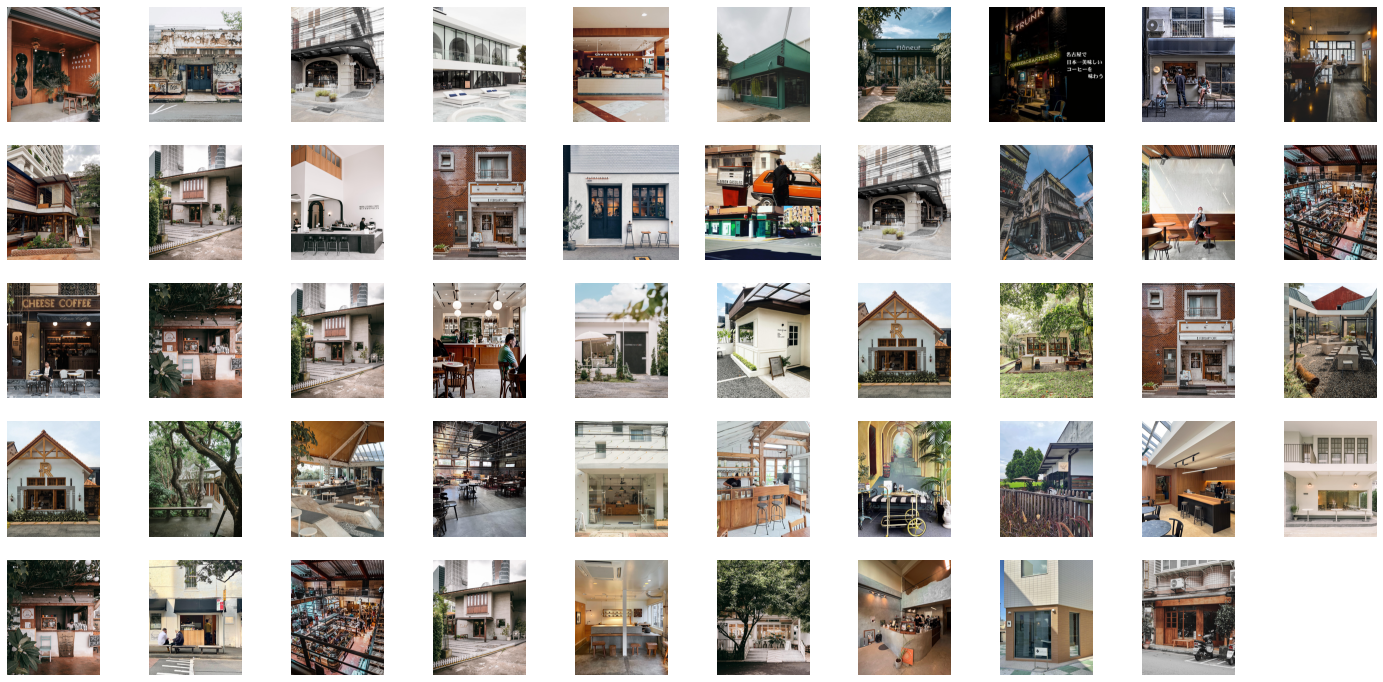

In [ ]:
# Can see patterns within current clustering and discern themes

# First Cluster: "Coffee Shops & Exteriors"

view_cluster(0)

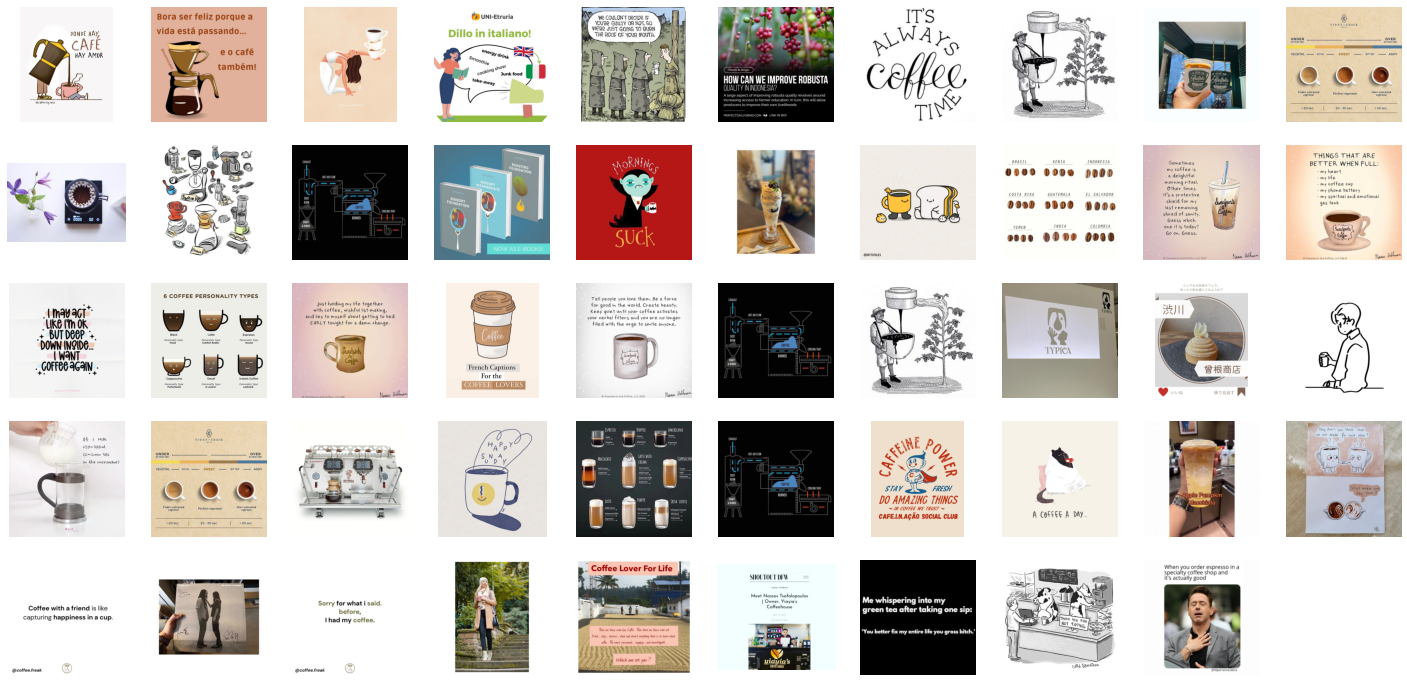

In [ ]:
# Second Cluster: Graphics & Text 

view_cluster(1)

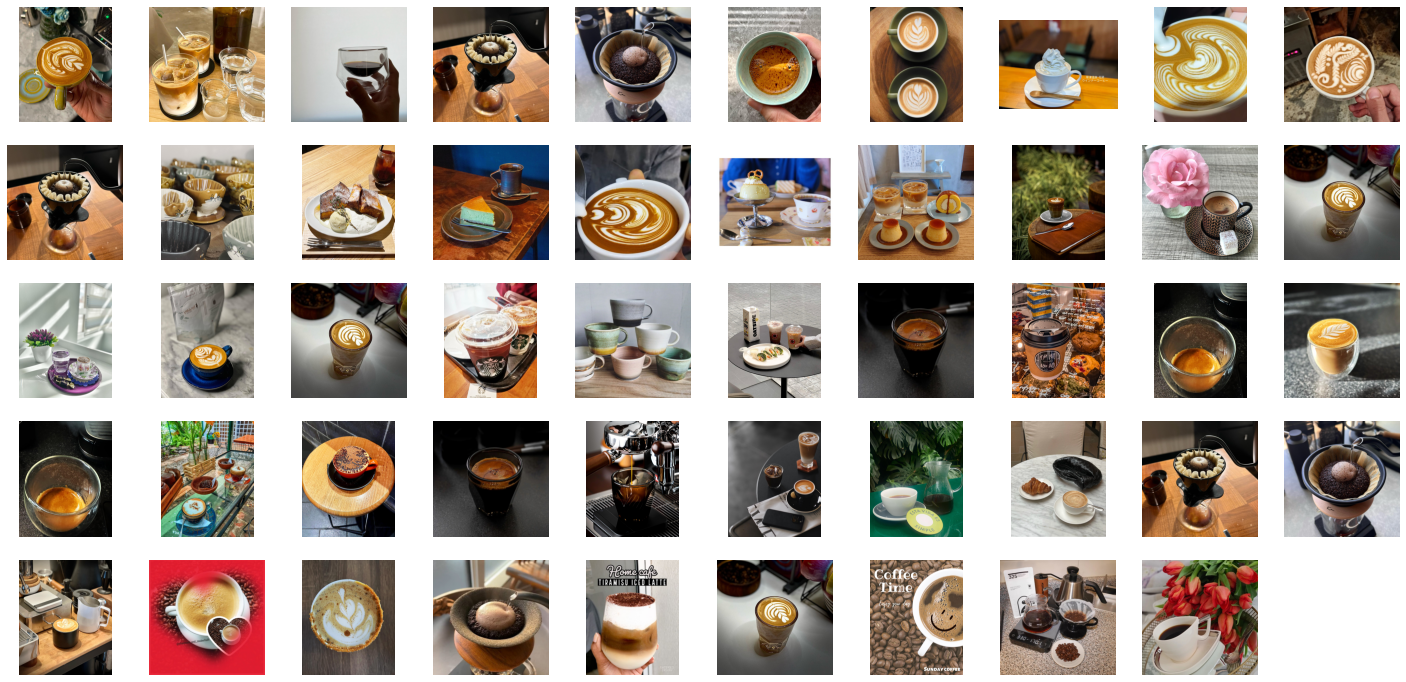

In [ ]:
# Third Cluster: Coffee Product & Design

view_cluster(2)

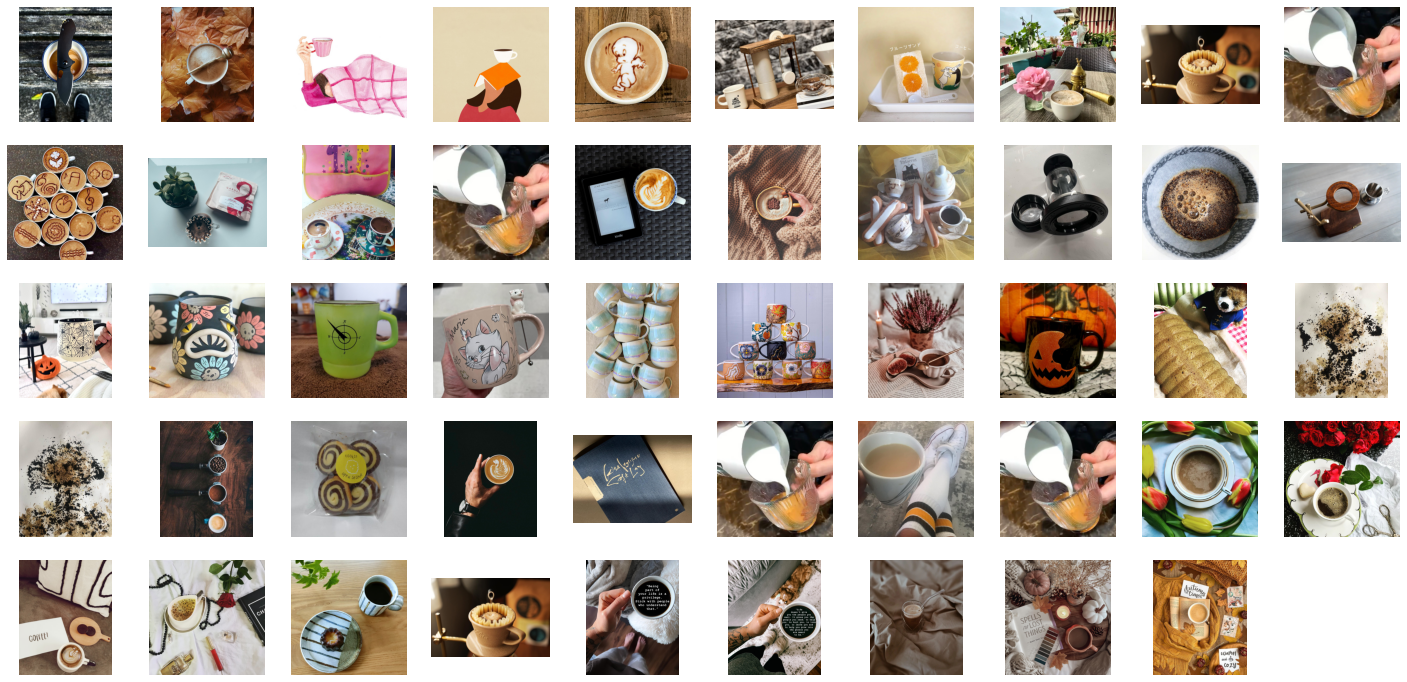

In [ ]:
# Fourth Cluster: Miscellaneous (Could change cluster sizes)

view_cluster(3)

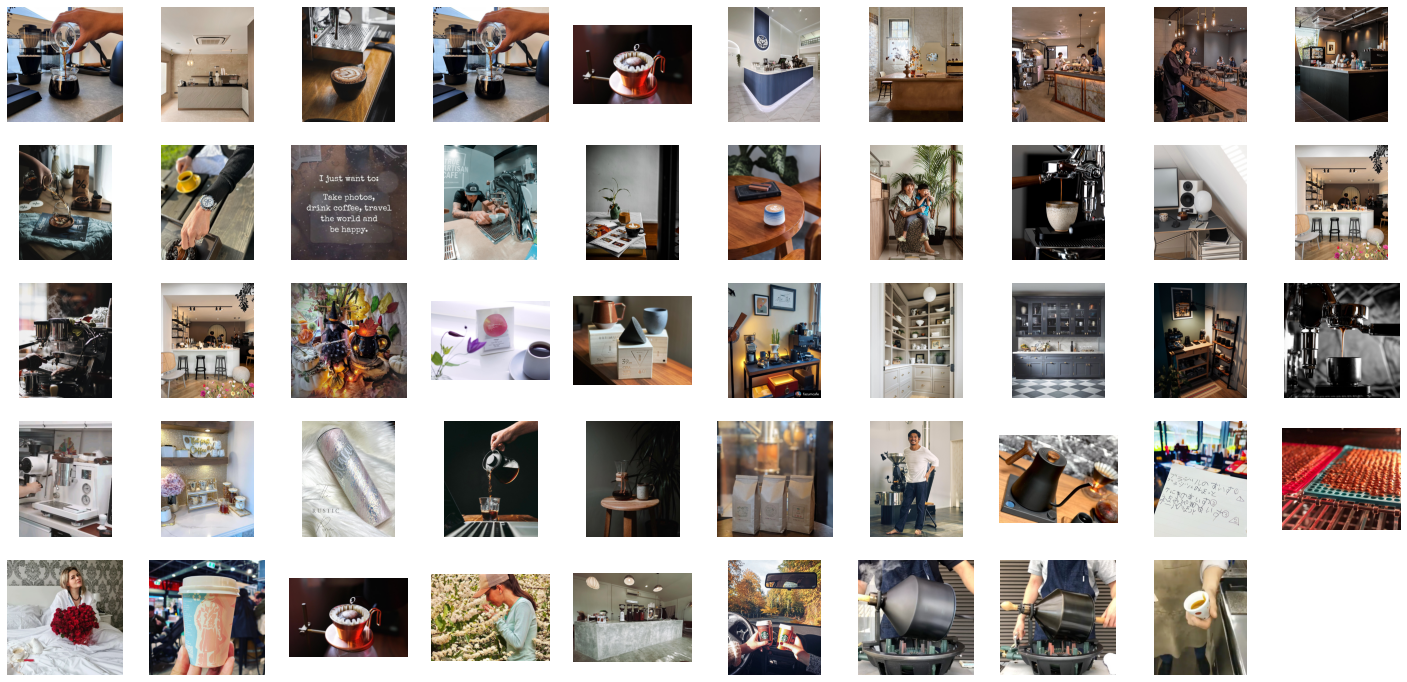

In [ ]:
# Fifth Cluster: Coffee Shop Interiors & People

view_cluster(4)

In [ ]:
sse = []

list_k = list(range(3, 50))

for k in list_k: 
  km = KMeans(init="random", n_clusters=k, n_init=10, max_iter=100, random_state=22)

  km.fit(x)

  sse.append(km.inertia_)

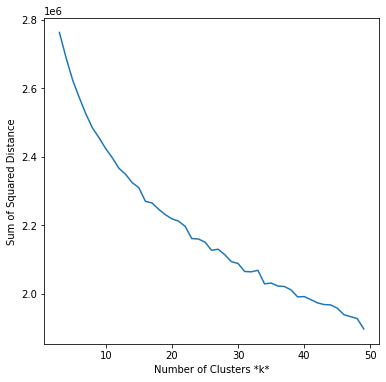

In [ ]:
# Evaluating "best" clustering - just beginning this process and will refine later

plt.figure(figsize=(6, 6))

plt.plot(list_k, sse)

plt.xlabel(r'Number of Clusters *k*')
plt.ylabel(r'Sum of Squared Distance');